In [1]:
#abc

In [11]:
from ultralytics import YOLO
model = YOLO('/home/dandelions/Documents/tennis_analyse/train/train_ball/weights/best.pt')

In [4]:
results = model.predict('/home/dandelions/Documents/tennis_analyse/matches/frame.png' , save = True)


image 1/1 /home/dandelions/Documents/tennis_analyse/matches/frame.png: 384x640 (no detections), 496.4ms
Speed: 5.4ms preprocess, 496.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3


In [9]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (1080, 1920)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))

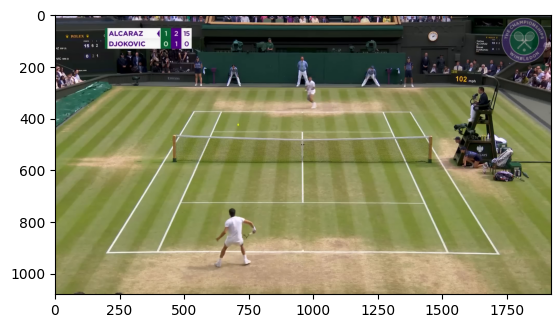

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
imag = cv2.imread('matches/frame.png')
for result in results:
    boxes = result.boxes
    for box in boxes:
        # Get the bounding box coordinates
        x1, y1, x2, y2 = box.xyxy[0].astype(int)
        
        # Draw the bounding box
        cv2.rectangle(imag, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box with thickness 2
        
        # Optionally, you can also put a label with the class name and confidence
        label = f'{box.cls} {box.conf:.2f}'
        cv2.putText(imag, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

imag = np.array(imag)
imag_rgb = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
plt.imshow(imag_rgb)


In [17]:
!yolo task=detect mode=predict source="/home/dandelions/Documents/tennis_analyse/matches/portion_djoko.mp4" \
 model="/home/dandelions/Documents/tennis_analyse/train/train_ball/weights/best.pt" show=True

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()
OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'

Ultralytics YOLOv8.2.58 🚀 Python-3.12.4 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i3-1115G4 3.00GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/367) /home/dandelions/Documents/tennis_analyse/matches/portion_djoko.mp4: 384x640 (no detections), 595.9ms
video 1/1 (frame 2/367) /home/dandelions/Documents/tennis_analyse/matches/portion_djoko.mp4: 384x640 (no detections), 532.3ms
video 1/1 (frame 3/367) /home/dandelions/Documents/tennis_analyse/matches/portion_djoko.mp4: 384x640 (no detections), 513.4ms
video 1/1 (frame 4/367) /home/dandelion